In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [2]:
class Perceptron01(object):
    """
    Perceptron classifier (target values in {0,1})
    
    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015, with modifications.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Number of passes over the training set
        
    Attributes    
    ------------
    w_ : id-array
        Weights after fitting
    errors: list
        Number of misclassifications in each epoch        
    """    
    def __init__(self, eta=0.2, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        """
        Fit training data
        
        Paramters
        ------------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values
            
        Returns
        ------------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []        
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_ [0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            i += 1
        return self
    
    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """ Return class label after each setp """
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [3]:
# NOT

AOX =([0,1],[1,0])
AO = np.array(AOX)

# AO is m x n array where m is the number of samples, and n-1 is the number of features of each observation.
# Row i contains the ith sample.
# Column j contains the values of feature j if j < n and the values of the classification/value of each sample if j = n.

X = np.array(AO[:,0])
X.shape = (2,1)
y = np.array(AO[:,1])
y.shape = (2,1)


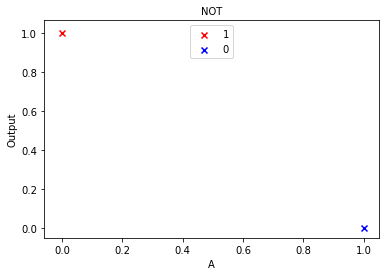

In [4]:
# NOT

plt.close('all')
plt.scatter(x = X[y == 1], y = y[y == 1], color='red', marker='x', label='1')
plt.scatter(x = X[y == 0], y = y[y == 0], color='blue', marker='x', label='0')
plt.xlabel('A')
plt.ylabel('Output')
plt.title('NOT', fontsize='medium')
plt.legend(loc='upper center', fontsize='medium')
plt.show()

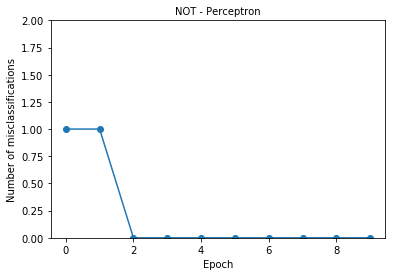

In [5]:
# NOT

ppn = Perceptron01(eta=0.2, n_iter=10)
ppn.fit(X,y)
plt.close('all')
plt.plot(range(0, len(ppn.errors_) ), ppn.errors_, marker='o')
plt.ylim([0, max(ppn.errors_) + 1])
plt.xlabel('Epoch')
plt.ylabel('Number of misclassifications')
plt.title('NOT - Perceptron', fontsize ='medium')
plt.show()


In [6]:
# NAND

ABOX =([0,0,1],[0,1,1],[1,0,1],[1,1,0])
ABO = np.array(ABOX)

# ABO is m x n array where m is t,
# Column j contains the values of feature j if j < n and the values of the classification/value of each sample if j = n.

X = np.array(ABO[:,0:2])
y = np.array(ABO[:,2])


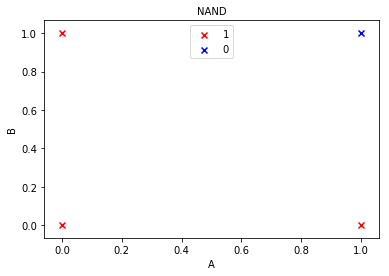

In [7]:
# NAND

plt.close('all')
plt.scatter(x = X[y == 1, 0], y = X[y == 1, 1], color='red', marker='x', label='1')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color='blue', marker='x', label='0')
plt.xlabel('A')
plt.ylabel('B')
plt.title('NAND', fontsize='medium')
plt.legend(loc='upper center', fontsize='medium')
plt.show()

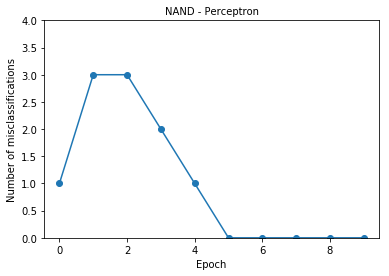

In [8]:
# NAND

ppn = Perceptron01(eta=0.2, n_iter=10)
ppn.fit(X,y)
plt.close('all')
plt.plot(range(0, len(ppn.errors_)), ppn.errors_, marker='o')
plt.ylim([0, max(ppn.errors_) + 1])
plt.xlabel('Epoch')
plt.ylabel('Number of misclassifications')
plt.title('NAND - Perceptron', fontsize='medium')
plt.show()


In [9]:
# XOR

ABOX =([0,0,0],[0,1,1],[1,0,1],[1,1,0])
ABO = np.array(ABOX)

# ABO is m x n array where m is t,
# Column j contains the values of feature j if j < n and the values of the classification/value of each sample if j = n.

X = np.array(ABO[:,0:2])
y = np.array(ABO[:,2])


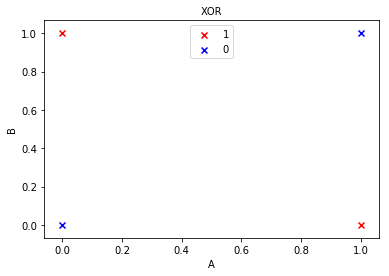

In [10]:
# XOR

plt.close('all')
plt.scatter(x = X[y == 1, 0], y = X[y == 1, 1], color='red', marker='x', label='1')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color='blue', marker='x', label='0')
plt.xlabel('A')
plt.ylabel('B')
plt.title('XOR', fontsize='medium')
plt.legend(loc='upper center', fontsize='medium')
plt.show()

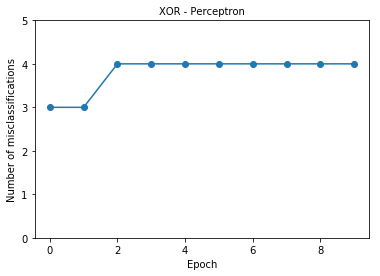

In [11]:
# XOR

ppn = Perceptron01(eta=0.2, n_iter=10)
ppn.fit(X,y)
plt.close('all')
plt.plot(range(0, len(ppn.errors_)), ppn.errors_, marker='o')
plt.ylim([0, max(ppn.errors_) + 1])
plt.xlabel('Epoch')
plt.ylabel('Number of misclassifications')
plt.title('XOR - Perceptron', fontsize='medium')
plt.show()


In [12]:
# Iris Dataset

In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

df.tail()

IA = df.iloc[:,:].values
for i_ in range(0,len(df),10):
    print(i_, IA[i_,:])


0 [5.1 3.5 1.4 0.2 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
30 [4.8 3.1 1.6 0.2 'Iris-setosa']
40 [5.0 3.5 1.3 0.3 'Iris-setosa']
50 [7.0 3.2 4.7 1.4 'Iris-versicolor']
60 [5.0 2.0 3.5 1.0 'Iris-versicolor']
70 [5.9 3.2 4.8 1.8 'Iris-versicolor']
80 [5.5 2.4 3.8 1.1 'Iris-versicolor']
90 [5.5 2.6 4.4 1.2 'Iris-versicolor']
100 [6.3 3.3 6.0 2.5 'Iris-virginica']
110 [6.5 3.2 5.1 2.0 'Iris-virginica']
120 [6.9 3.2 5.7 2.3 'Iris-virginica']
130 [7.4 2.8 6.1 1.9 'Iris-virginica']
140 [6.7 3.1 5.6 2.4 'Iris-virginica']


In [14]:
# get Iris classifications

IC = np.unique(IA[:,4])
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print(IC[i], pltC[i], pltM[i])
    

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


In [15]:
# Setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])


sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


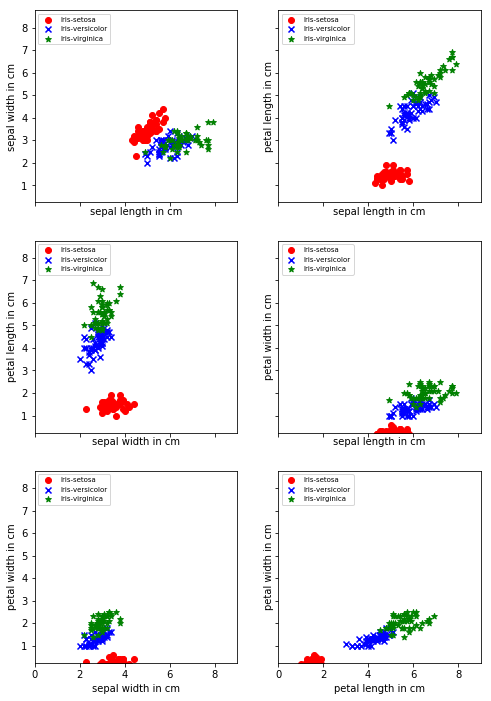

In [16]:
# plot classifications of all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)

Cl = IA[:,4]
i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    yF = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        xF = IrisF[j]
        ax[k1,k2].scatter(x=IA[Cl == IC[0], j], y=IA[Cl == IC[0], i], color=pltC[0], marker=pltM[0], label=IC[0])
        ax[k1,k2].scatter(x=IA[Cl == IC[1], j], y=IA[Cl == IC[1], i], color=pltC[1], marker=pltM[1], label=IC[1])
        ax[k1,k2].scatter(x=IA[Cl == IC[2], j], y=IA[Cl == IC[2], i], color=pltC[2], marker=pltM[2], label=IC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim([0,9])
        ax[k1,k2].set_ylim([0,9])
        ax[k1,k2].set_xlabel(xF)
        ax[k1,k2].set_ylabel(yF)
        ax[k1,k2].legend(loc='upper left', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

In [17]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
cdx = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx = np.array([0,2])

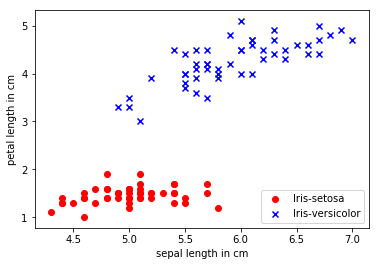

In [18]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        
        NC[j] = 0
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1

plt.close('all')
plt.scatter(x = NF[NC == 0, 0], y = NF[NC == 0, 1], color=pltC[cdx[0]], marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[1]], marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx[0]])
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='lower right', fontsize='medium')
plt.show()

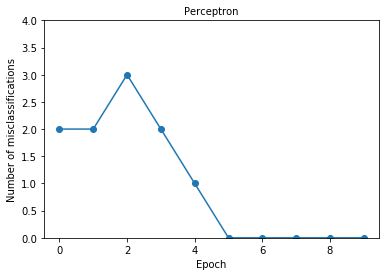

In [19]:
ppn = Perceptron01(eta=0.2, n_iter=10)
ppn.fit(NF,NC)
plt.close('all')
plt.plot(range(0, len(ppn.errors_)), ppn.errors_, marker='o')
plt.ylim([0, max(ppn.errors_) + 1])
plt.xlabel('Epoch')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron', fontsize='medium')
plt.show()

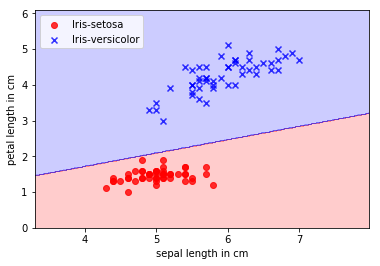

In [20]:
plt.close('all')
def plot_decision_regions(NF,NC, classifier, resolution=0.02):
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(NC))])
    x1_min, x1_max = NF[:, 0].min() - 1, NF[:, 0].max() + 1
    x2_min, x2_max = NF[:, 1].min() - 1, NF[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max()) 
    for idx, cls in enumerate(np.unique(NC)):
        plt.scatter(x=NF[NC == cls, 0], y=NF[NC == cls, 1], alpha=0.8, color=pltC[cdx[idx]], marker=pltM[cdx[idx]], label=IC[cdx[idx]])
plot_decision_regions(NF, NC, classifier=ppn)
plt.xlabel(IrisF[fdx[0]])
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='upper left', fontsize='medium')
plt.show()


In [21]:
# focus on classification of "versicolor" and "verginica", class indexes 1 and 2
cdx = np.array([1,2])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx = np.array([0,2])

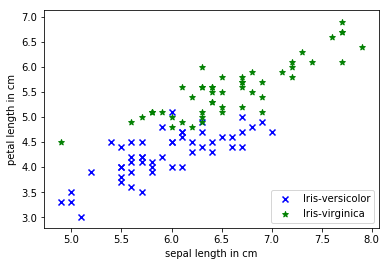

In [22]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        
        NC[j] = 0
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1

plt.close('all')
plt.scatter(x = NF[NC == 0, 0], y = NF[NC == 0, 1], color=pltC[cdx[0]], marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[1]], marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx[0]])
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='lower right', fontsize='medium')
plt.show()

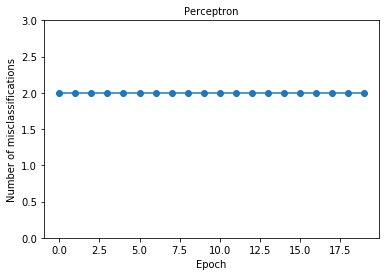

In [23]:
ppn = Perceptron01(eta=0.2, n_iter=20)
ppn.fit(NF,NC)
plt.close('all')
plt.plot(range(0, len(ppn.errors_)), ppn.errors_, marker='o')
plt.ylim([0, max(ppn.errors_) + 1])
plt.title('Perceptron', fontsize='medium')
plt.xlabel('Epoch')
plt.ylabel('Number of misclassifications')
plt.show()

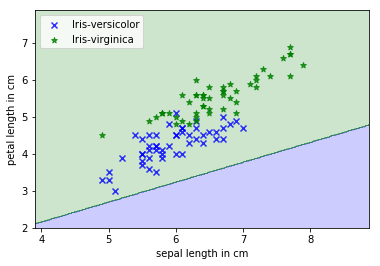

In [24]:
plt.close('all')
def plot_decision_regions(NF,NC, classifier, resolution=0.02):
    colors = ('blue','green')
    cmap = ListedColormap(colors[:len(np.unique(NC))])
    x1_min, x1_max = NF[:, 0].min() - 1, NF[:, 0].max() + 1
    x2_min, x2_max = NF[:, 1].min() - 1, NF[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max()) 
    for idx, cls in enumerate(np.unique(NC)):
        plt.scatter(x=NF[NC == cls, 0], y=NF[NC == cls, 1], alpha=0.8, color=pltC[cdx[idx]], marker=pltM[cdx[idx]], label=IC[cdx[idx]])
plot_decision_regions(NF, NC, classifier=ppn)
plt.xlabel(IrisF[fdx[0]])
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='upper left', fontsize='medium')
plt.show()
